In [1]:
# 1 

import numpy as np

def LUdecomp(a):
    n = len(a)
    for k in range(0,n-1):
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a [i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                a[i,k] = lam
    return a

def LUsolve(a,b):
    n = len(a)
    for k in range(1,n):
        b[k] = b[k] - np.dot(a[k,0:k],b[0:k])
    b[n-1] = b[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    
    return b

c = np.array([ -1., -2.,  3.,  3.     ])
d = np.array([  6.,  7.,  8.,  7.,  5.])
e = np.array([  2.,  2.,  2., -2.     ])
b = np.eye(5)

C = np.diag(c,k=-1)
D = np.diag(d)
E = np.diag(e,k=1)

A = C + E + D

a = LUdecomp(A.copy())

print(f"""
x_n:
{LUsolve(a,b.copy())}

A_inv:
{np.linalg.inv(A)}

x_n = A_inv
""")


x_n:
[[ 0.15961975 -0.0422815   0.01163451 -0.00283768 -0.00113507]
 [ 0.02114075  0.12684449 -0.03490352  0.00851305  0.00340522]
 [ 0.00581725  0.03490352  0.12797957 -0.03121453 -0.01248581]
 [-0.00212826 -0.01276958 -0.04682179  0.13337117  0.05334847]
 [ 0.00127696  0.00766175  0.02809308 -0.0800227   0.16799092]]

A_inv:
[[ 0.15961975 -0.0422815   0.01163451 -0.00283768 -0.00113507]
 [ 0.02114075  0.12684449 -0.03490352  0.00851305  0.00340522]
 [ 0.00581725  0.03490352  0.12797957 -0.03121453 -0.01248581]
 [-0.00212826 -0.01276958 -0.04682179  0.13337117  0.05334847]
 [ 0.00127696  0.00766175  0.02809308 -0.0800227   0.16799092]]

x_n = A_inv



In [2]:
# 2

import time
import numpy as np

def LUdecomp3(c,d,e):
    n = len(d)
    for k in range(1,n):
        lam = c[k-1]/d[k-1]
        d[k] = d[k] - lam*e[k-1]
        c[k-1] = lam
    
    return c,d,e

def LUsolve3(c,d,e,b):
    n = len(d)
    for k in range(1,n):
        b[k] = b[k] - c[k-1]*b[k-1]
    
    b[n-1] = b[n-1]/d[n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]
    
    return b

def fun1(n):
    time_start = time.time()

    A = []
    b = 5*np.ones(n)
    b[0] = 9

    c = -1*np.ones(n-1)
    d = 4*np.ones(n)
    e = -1*np.ones(n-1)

    cc,dd,ee = LUdecomp3(c,d,e)
    ans = LUsolve3(cc,dd,ee,b)

    time_finish = time.time()

    return ans, time_finish-time_start


def fun2(n):
    time_start = time.time()
    A = (-1)*np.eye(n,k=-1) + 4*np.eye(n) + (-1)*np.eye(n,k=1)
    
    b = 5*np.ones(n)
    b[0] = 9
    
    a = LUdecomp(A.copy())
    ans = LUsolve(a,b)
    
    time_finish = time.time()
    return ans, time_finish-time_start

n_8 = [fun1(8),fun2(8)]
n_10 = [fun1(10),fun2(10)]
n_12 = [fun1(12),fun2(12)]


print(f"""
t1: using LUdecomp3, LUsolve3
t2: using LUdecomp, LUsolve

1) n = 8
    x_n = {n_8[0][0]}
     t1 = {n_8[0][1]}
     t2 = {n_8[1][1]}
  t2/t1 = {n_8[1][1]/n_8[0][1]}
  
2) n = 10
    x_n = {n_10[0][0]}
     t1 = {n_10[0][1]}
     t2 = {n_10[1][1]}
  t2/t1 = {n_10[1][1]/n_10[0][1]}
  
3) n = 12
    x_n = {n_12[0][0]}
     t1 = {n_12[0][1]}
     t2 = {n_12[1][1]}
  t2/t1 = {n_12[1][1]/n_12[0][1]}
""")


t1: using LUdecomp3, LUsolve3
t2: using LUdecomp, LUsolve

1) n = 8
    x_n = [2.90186213 2.60744851 2.52793193 2.5042792  2.48918486 2.45246023
 2.32065606 1.83016402]
     t1 = 8.392333984375e-05
     t2 = 0.0004563331604003906
  t2/t1 = 5.4375
  
2) n = 10
    x_n = [2.90191936 2.60767745 2.52879042 2.50748425 2.50114659 2.4971021
 2.48726181 2.45194513 2.3205187  1.83012968]
     t1 = 8.630752563476562e-05
     t2 = 0.0002346038818359375
  t2/t1 = 2.718232044198895
  
3) n = 12
    x_n = [2.90192347 2.60769388 2.52885206 2.50771437 2.5020054  2.50030723
 2.49922351 2.49658681 2.48712374 2.45190814 2.32050884 1.83012721]
     t1 = 7.2479248046875e-05
     t2 = 0.00032639503479003906
  t2/t1 = 4.503289473684211



In [3]:
# 3

import matplotlib.pyplot as plt

In [4]:
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams['font.size'] = '13'

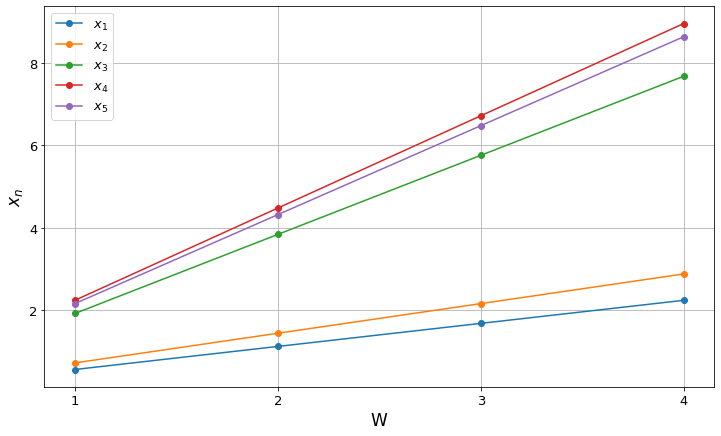


W = 1, x_n = [0.56 0.72 1.92 2.24 2.16]
W = 2, x_n = [1.12 1.44 3.84 4.48 4.32]
W = 3, x_n = [1.68 2.16 5.76 6.72 6.48]
W = 4, x_n = [2.24 2.88 7.68 8.96 8.64]



In [5]:
k = 2.5
W = np.array([1.0, 2.0, 3.0, 4.0])

A = np.array([[  2.0, -1.0,  0.0,  0.0,  0.0],
              [ -1.0,  4.0, -1.0,  0.0,  0.0],
              [  0.0, -1.0,  4.0, -1.0, -2.0],
              [  0.0,  0.0, -1.0,  2.0, -1.0],
              [  0.0,  0.0, -2.0, -1.0,  3.0]])

b = np.array([(i/k)*np.ones(5) for i in W])

ans = (np.array([np.linalg.solve(A.copy(),i) for i in b])).T

for i in range(len(ans)):
    plt.plot(W,ans[i],'o-',label=f"$x_{i+1}$")

plt.xlabel("W", size=17)
plt.ylabel("$x_n$", size=17)
plt.xticks([1,2,3,4])
plt.legend()
plt.grid()
plt.show()

print(f"""
W = 1, x_n = {ans.T[0]}
W = 2, x_n = {ans.T[1]}
W = 3, x_n = {ans.T[2]}
W = 4, x_n = {ans.T[3]}

""")